In [32]:
library(ggplot2)
library(tibble)
library(tidyverse)
library(readr)
library(scales)
library(EnvStats)


### Exercise 1 - Triangular Distribution

The triangular distribution, in the interval (a, b), is given by the following:



$$ f(x) = \begin{cases} \frac{2(x-a)}{(b-a)(c-a)}, & \mbox{if } a ≤ x < c \\ \frac{2(b-x)}{(b-a)(b-c)}, & \mbox{if } c ≤ x < b 
\\ 0 & \mbox{if } otherwise \end{cases} $$


where c ∈ [a, b].<br>
a) plot the function, given the interval (a, b)<br>
b) and write an algorithm to generate random numbers from the triangular distribution<br>
c) generate 104 random number from the distribution, show them in an histogram and superimpose the analytical curve



In [2]:
f1 <- function(x,a,b,c){
    
    if((x >= a) & (x < c)){
    result <- 2*(x-a)/((b-a)*(c-a))
        
    }else if((x >= c) & (x <= b)) {
    result <- 2*(b-x)/((b-a)*(b-c))
    }else {
        result <-0
    }
    
        
        
    return(result)
    }

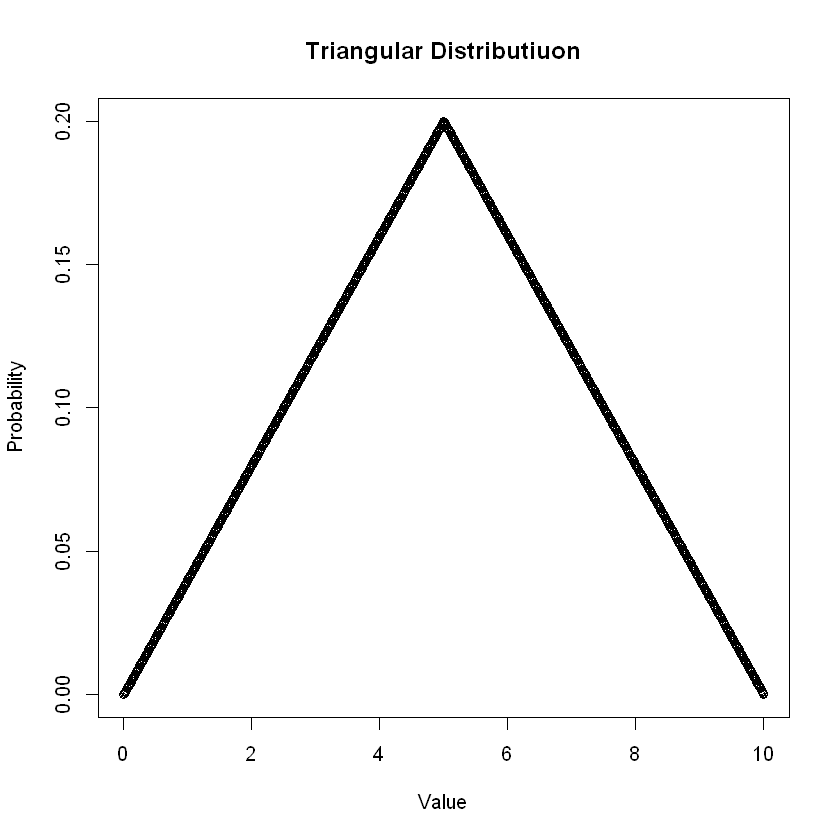

In [3]:
# Plotting the Distribution given a and b, taking c as the middle point between them

f1_v <- Vectorize(f1)
dx <- 0.01
x <- seq(0, 10, by = dx)
a <- 0
b <- 10
c <- (a+b)/2

plot(x,f1_v(x,a,b,c),main= "Triangular Distributiuon"
     ,xlab="Value"
     ,ylab="Probability")



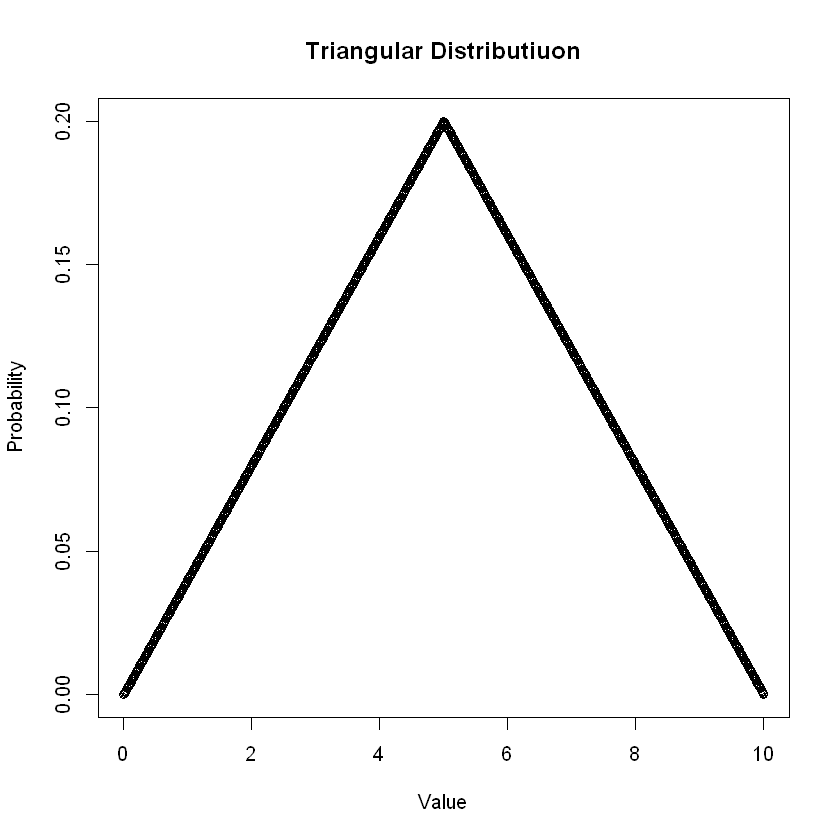

In [4]:
#Try a function from EnvStats to see if it gives the same result
plot(x,dtri(x, min = a, max = b, mode = c),main= "Triangular Distributiuon"
     ,xlab="Value"
     ,ylab="Probability")

In [5]:
rng_tri <- function(a,c,b){
    
    limit <- (c-a)/(b-a)
    u <- runif(1,0,1)
    
    if((0<u) & (u < limit)){
    result <- a+sqrt(u*(b-a)*(c-a))
        
    }else if((limit <= u) & (u < 1)) {
    result <- b -sqrt((1-u)*(b-a)*(b-c))
    }else {
        result <-10
    }
    
        
        
    return(result)
    }

In [6]:
##Getting the random numbers without vectorize statement and using a loop
i <- 0
triangulo <- 0
while (i<100000){
    triangulo <- append(rng_tri(a,c,b),triangulo)
    i <- i+1
}


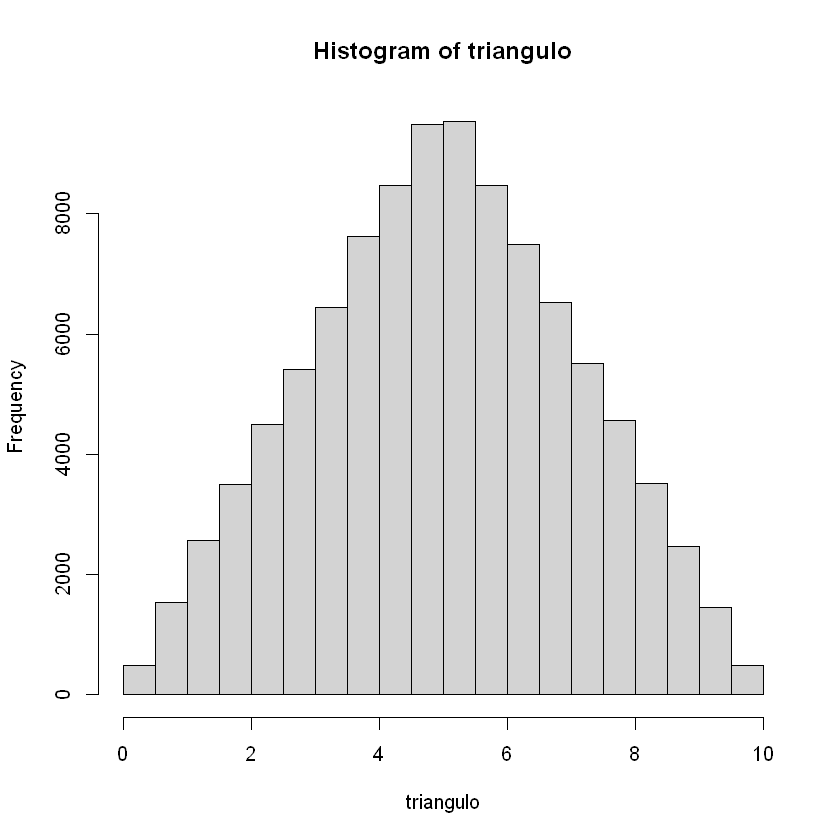

In [7]:
#Now we plot the histogram
hist(triangulo)


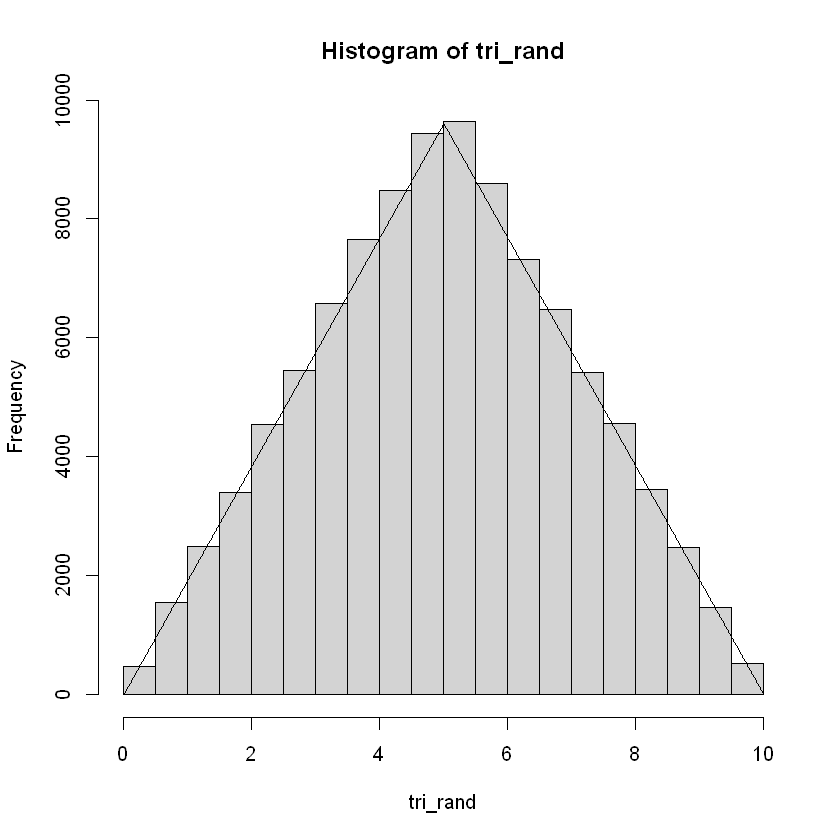

In [8]:
#Try to see if we get the same result from our library
tri_rand <- rtri(100000, min = a, max = b, mode = c)

hist(tri_rand)
lines(x,dtri(x, min = a, max = b, mode = c)*48000)

### Exercise 2 -  Markov’s inequality

We have a function whose input is k that contains the probability of a variable to be greater than k

$$ P(X ≥ k) ≤ \frac{E[X]}{k} \textrm{ for }  k > 0 $$

having defined a function
$$ G(k) = 1 − F(k) ≡ P(X ≥ k) $$

a) the exponential, Exp(λ = 1), distribution function<br>
b) the uniform, U(3, 5), distribution function<br>
c) the binomial, Bin(n = 1, p = 1/2), distribution function<br>
d) a Poisson, Pois(λ = 1/2), distribution function<br>

In [9]:
dx <- 0.01
x <- seq(0.1, 5, by = dx)
xint <- seq(0,10)

## Exponential

expo <- dexp(x, rate = 1)
p_expo <- pexp(x, rate = 1)
e_expo <- weighted.mean(x,expo)
## Uniform

unif <- dunif(x, min = 3, max = 5)
p_unif <- punif(x, min = 3, max = 5)
e_unif <- weighted.mean(x,unif)

## Binomial
binom <- dbinom(xint,1,0.5)
p_binom <- pbinom(xint,1,0.5)
e_binom <- weighted.mean(xint,binom)
## Poisson

pois <- dpois(xint, lambda = 3)
p_pois <- ppois(xint, lambda = 3)
e_pois <- weighted.mean(xint,pois)


In [10]:
f_markov<-function(f,e,k){
    result <- e/k
}

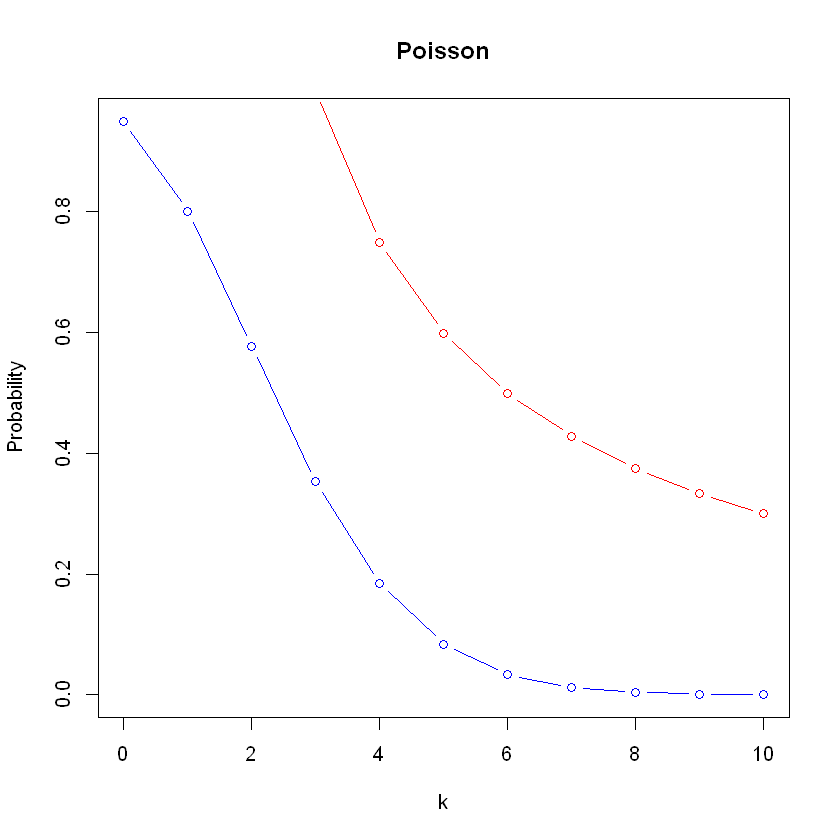

In [11]:
#First attempt to plot the upper bound, we see that from the selected range, 
#the red graph(Markov) is always greater than the blue one(G(x))

plot(xint,1-p_pois,type = "b",col="blue",ylab="Probability",xlab = "k",main = "Poisson")
lines(xint,f_markov(pois,e_pois,xint),type = "b",col="red")


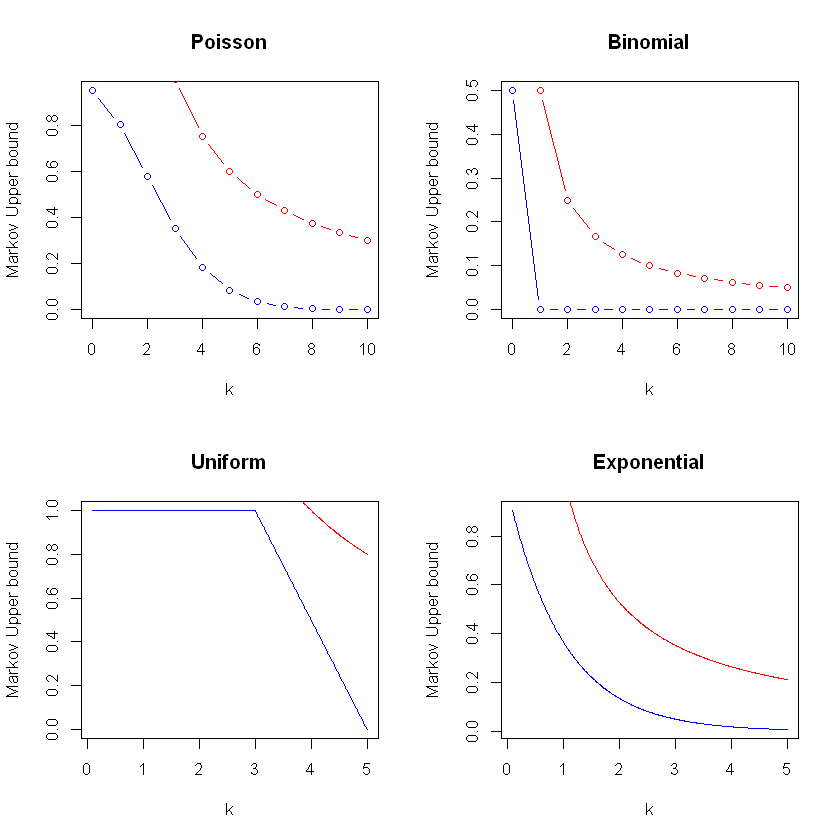

In [12]:
kint = xint
k = x

par(mfrow=c(2,2))


plot(xint,1-p_pois,type = "b",col="blue",xlab = "k",ylab="Markov Upper bound",main = "Poisson")
lines(kint,f_markov(pois,e_pois,kint),type = "b",col="red")

plot(xint,1-p_binom,type = "b",col="blue",xlab = "k",ylab="Markov Upper bound",main = "Binomial")
lines(kint,f_markov(binom,e_binom,kint),type = "b",col="red")

plot(x,1-p_unif,type = "l",col="blue",xlab = "k",ylab="Markov Upper bound",main = "Uniform")
lines(k,f_markov(unif,e_unif,k),type = "l",col="red")

plot(x,1-p_expo,type = "l",col="blue",xlab = "k",ylab="Markov Upper bound",main = "Exponential")
lines(k,f_markov(expo,e_expo,k),type = "l",col="red")


#Now we plot the selected distributions to check if they are all bounded

### Exercise 3 - Chebyshev’s inequality

Use R to show, with a plot, that Chebyshev’s inequality is is an upper bound to the
following distributions:

$$ P(X − µ ≥ kσ) ≤ \frac{1}{k^2} $$

• which can also be written as
$$ P(X − µ < kσ) ≥ 1 - \frac{1}{k^2} $$

use R to show, with a plot, that Chebyshev’s inequality is is an upper bound to the
following distributions:

a) a normal distribution, N(µ = 3, σ = 5)  <br>
b) an exponential distribution, Exp(λ = 1) <br>
c) a uniform distribution U(1 − $ \sqrt{2} $ ,1 + $ \sqrt{2} $ )<br>
d) a Poisson, Pois(λ = 1/3), distribution function<br>


In [21]:
dx <- 0.01
x <- seq(0.1, 15, by = dx)
x2 <- seq(-20, 20, by = dx)
xint <- seq(0,10)

## Exponential

expo <- dexp(x, rate = 1)
p_expo <- pexp(x, rate = 1)
e_expo <- weighted.mean(x,expo)
## Uniform

unif <- dunif(x, min = 1-sqrt(2), max = 1+sqrt(2))
p_unif <- punif(x, min = 1-sqrt(2), max = 1+sqrt(2))
sd_unif <-((1+sqrt(2))-(1-sqrt(2)))/sqrt(12)
e_unif <- weighted.mean(x,unif)

## Normal
norm <- dnorm(x2,3,5)
p_norm <- pnorm(x2,3,5)
e_norm <- weighted.mean(x2,norm)
## Poisson

pois <- dpois(xint, lambda = 1/3)
p_pois <- ppois(xint, lambda = 1/3)
e_pois <- weighted.mean(xint,pois)

In [14]:
f_chebyshev <- function(f,e,k){
    
    result <-1/(k)**2
}


In [15]:
### Testing how to say "The probability to be at k standard deviations from the mean"

k <- seq(0,10,by=0.1)
invisible(1-pnorm(3+5*k,3,5)+(pnorm(3-5*k,3,5)))

[1] 1.000000e+00 9.203443e-01 8.414806e-01 7.641772e-01 6.891565e-01
  [6] 6.170751e-01 5.485062e-01 4.839273e-01 4.237108e-01 3.681203e-01
 [11] 3.173105e-01 2.713321e-01 2.301393e-01 1.936010e-01 1.615133e-01
 [16] 1.336144e-01 1.095986e-01 8.913093e-02 7.186064e-02 5.743312e-02
 [21] 4.550026e-02 3.572884e-02 2.780690e-02 2.144822e-02 1.639507e-02
 [26] 1.241933e-02 9.322376e-03 6.933948e-03 5.110261e-03 3.731627e-03
 [31] 2.699796e-03 1.935206e-03 1.374276e-03 9.668483e-04 6.738585e-04
 [36] 4.652582e-04 3.182172e-04 2.155995e-04 1.446961e-04 9.619269e-05
 [41] 6.334248e-05 4.131501e-05 2.669150e-05 1.707981e-05 1.082509e-05
 [46] 6.795346e-06 4.224909e-06 2.601615e-06 1.586656e-06 9.583666e-07
 [51] 5.733031e-07 3.396535e-07 1.992885e-07 1.158027e-07 6.664090e-08
 [56] 3.797912e-08 2.143518e-08 1.198074e-08 6.631492e-09 3.635016e-09
 [61] 1.973175e-09 1.060685e-09 5.646316e-10 2.976457e-10 1.553770e-10
 [66] 8.031999e-11 4.111578e-11 2.084197e-11 1.046188e-11 5.200269e-12
 [71] 2.559678e-12 1.247619e-12 6.021553e-13 2.877688e-13 1.361489e-13
 [76] 6.377232e-14 2.957250e-14 1.357567e-14 6.203983e-15 2.837807e-15
 [81] 1.288230e-15 4.968405e-16 2.312158e-16 5.205570e-17 2.232393e-17
 [86] 9.479535e-18 3.985805e-18 1.659421e-18 6.840808e-19 2.792334e-19
 [91] 1.128588e-19 4.516591e-20 1.789749e-20 7.022284e-21 2.728154e-21
 [96] 1.049452e-21 3.997221e-22 1.507493e-22 5.629282e-23 2.081375e-23
[101] 7.619853e-24

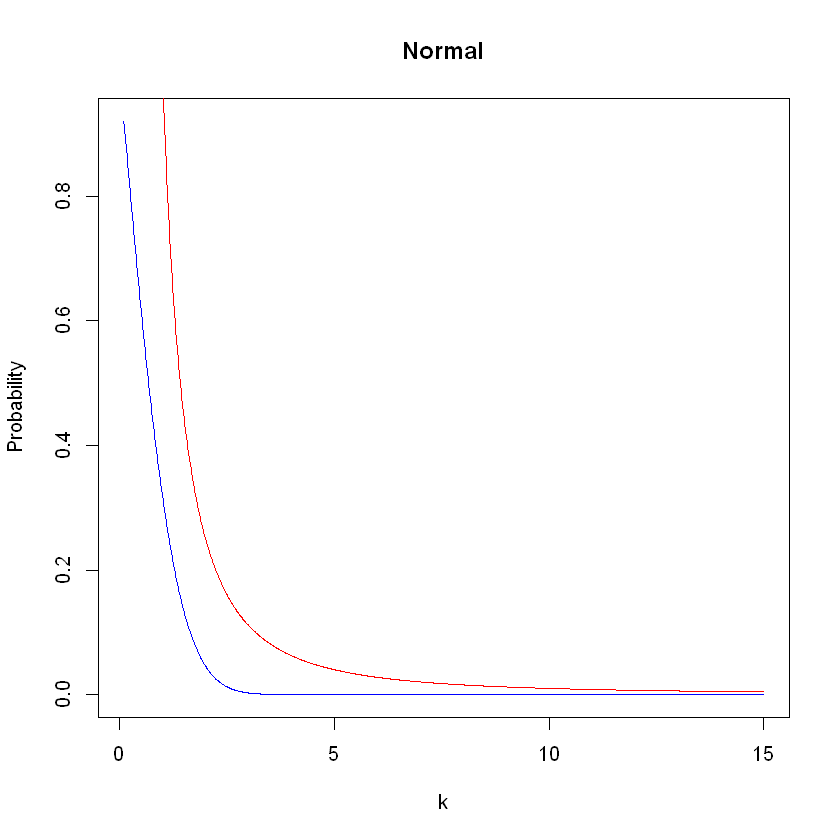

In [16]:
#We check if this is working on one

plot(x,1-pnorm(3+5*x,3,5)+(pnorm(3-5*x,3,5)),type = "l",col="blue",ylab="Probability",xlab = "k",main = "Normal")
lines(x,f_chebyshev(norm,e_norm,x),type = "l",col="red")

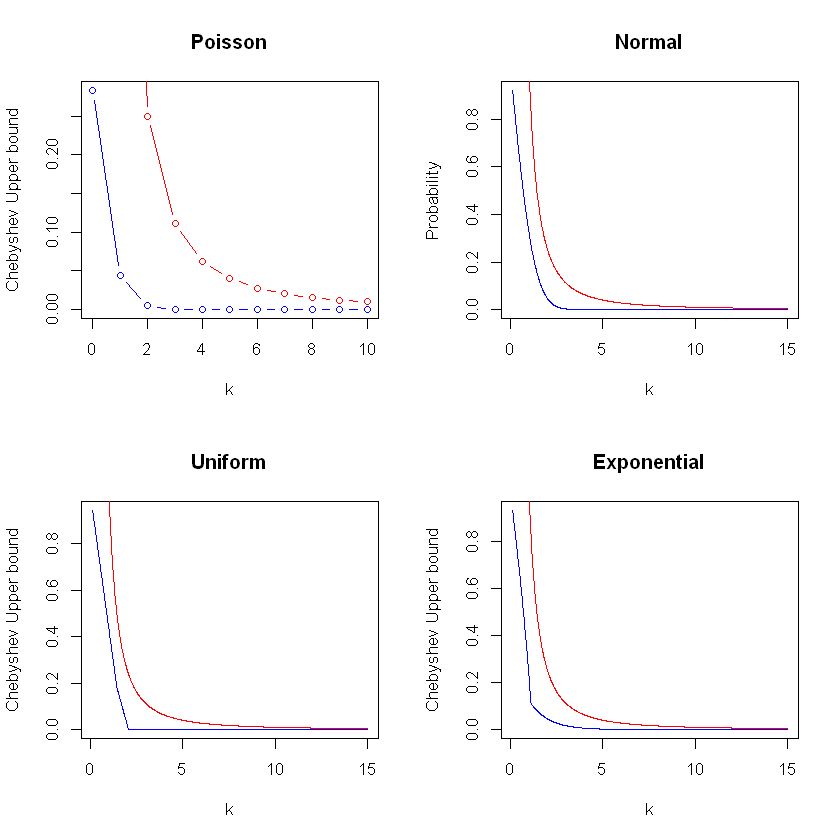

In [29]:
kint = xint
k = x
par(mfrow=c(2,2))
fig.dim = c(18, 16)

plot(xint,1-p_pois,type = "b",col="blue",xlab = "k",ylab="Chebyshev Upper bound",main = "Poisson")
lines(kint,f_chebyshev(pois,e_pois,kint),type = "b",col="red")

plot(x,1-(pnorm(3+5*x,3,5))+(pnorm(3-5*x,3,5)),type = "l",col="blue",ylab="Probability",xlab = "k",main = "Normal")
lines(x,f_chebyshev(norm,e_norm,x),type = "l",col="red")

plot(x,1-punif(e_unif+sd_unif*x,min = 1-sqrt(2), max = 1+sqrt(2))+(punif(e_unif-sd_unif*x,min = 1-sqrt(2), max = 1+sqrt(2))),type = "l",col="blue",xlab = "k",ylab="Chebyshev Upper bound",main = "Uniform")
lines(k,f_chebyshev(unif,e_unif,k),type = "l",col="red")

plot(x,1-pexp(e_expo+1*x,rate = 1)+(pexp(e_expo-1*x,rate = 1)),type = "l",col="blue",xlab = "k",ylab="Chebyshev Upper bound",main = "Exponential")
lines(k,f_chebyshev(expo,e_expo,k),type = "l",col="red")

#############################

### Exercise 4 - Six Boxes Toy Model: inference

What was the color of the stone? w/b/end > w
[1] "White Stone"
Box0:  0 Box1:  0.06666667 Box2:  0.1333333 Box3:  0.2 Box4:  0.2666667 Box5:  0.3333333 
What was the color of the stone? w/b/end > b


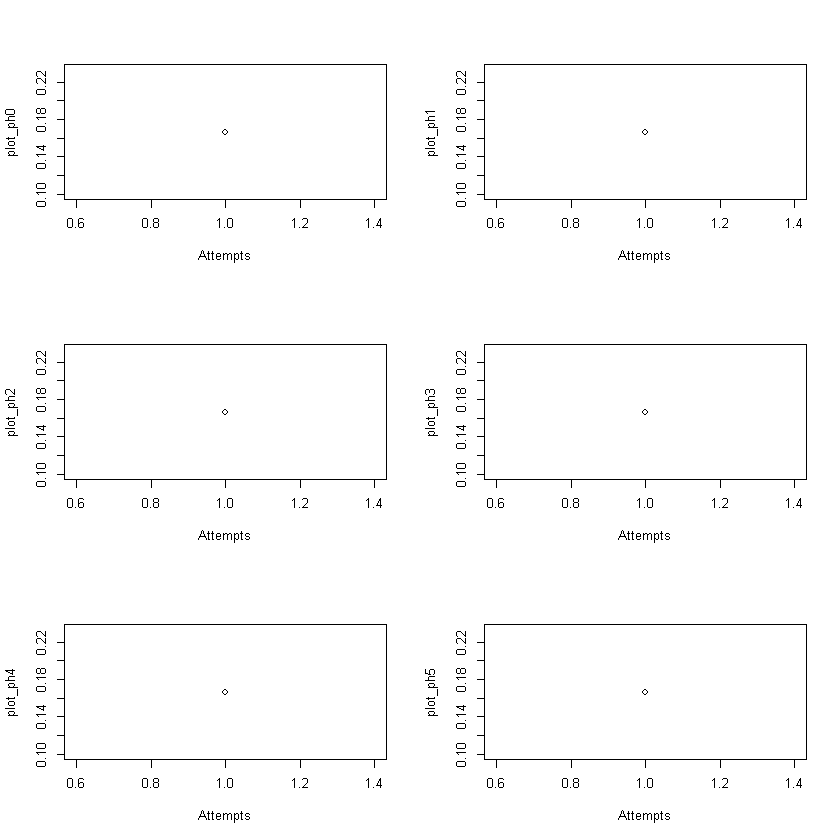

[1] "Black Stone"
Box0:  0 Box1:  0.2 Box2:  0.3 Box3:  0.3 Box4:  0.2 Box5:  0 
What was the color of the stone? w/b/end > w


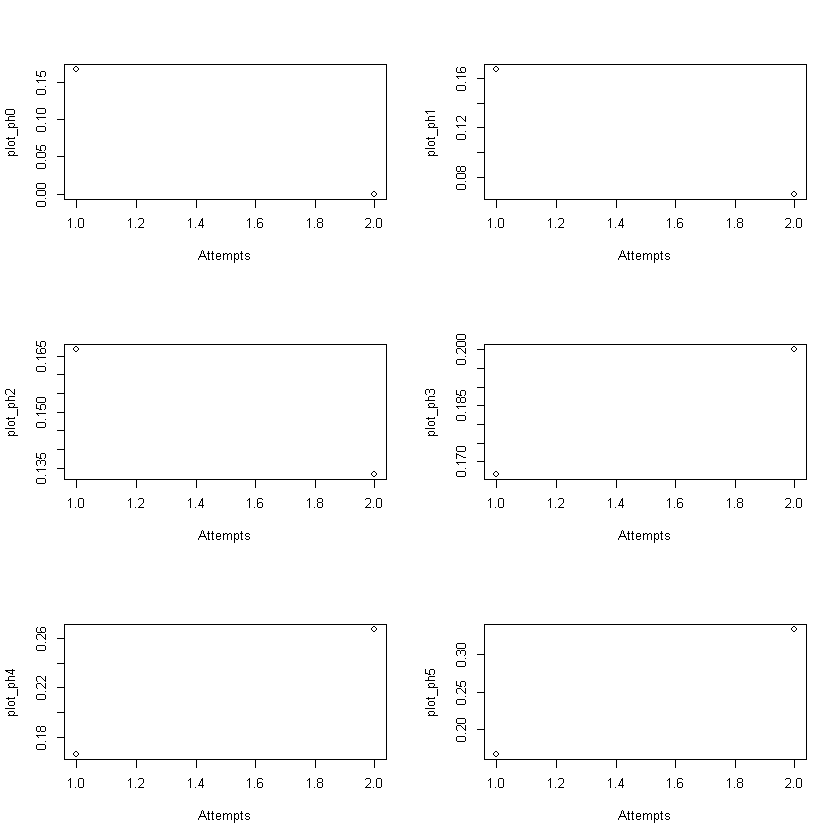

[1] "White Stone"
Box0:  0 Box1:  0.08 Box2:  0.24 Box3:  0.36 Box4:  0.32 Box5:  0 
What was the color of the stone? w/b/end > b


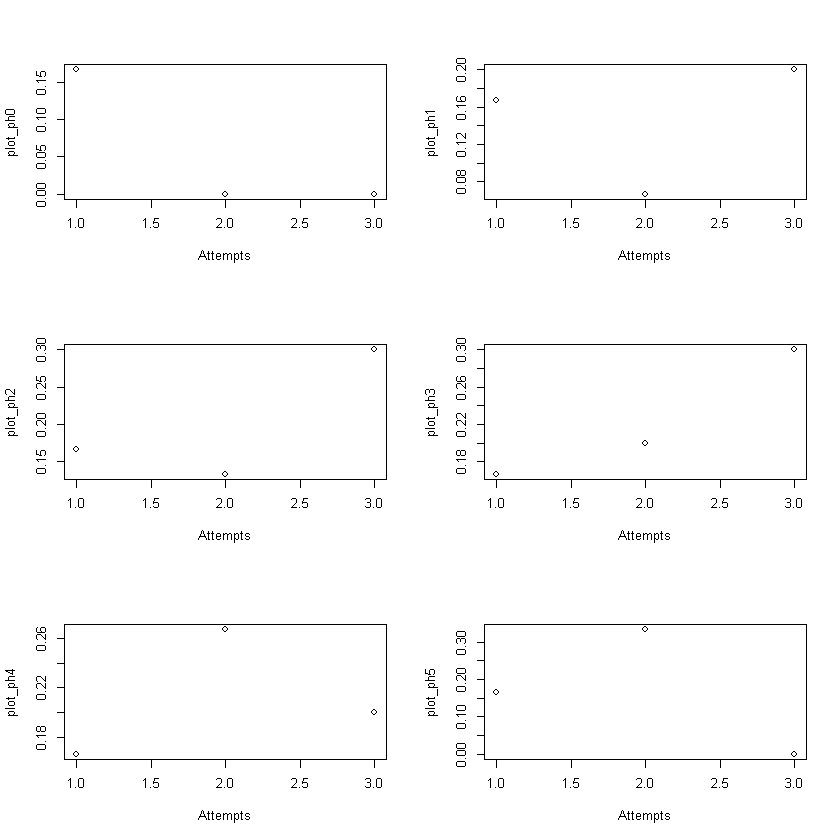

[1] "Black Stone"
Box0:  0 Box1:  0.1538462 Box2:  0.3461538 Box3:  0.3461538 Box4:  0.1538462 Box5:  0 
What was the color of the stone? w/b/end > w


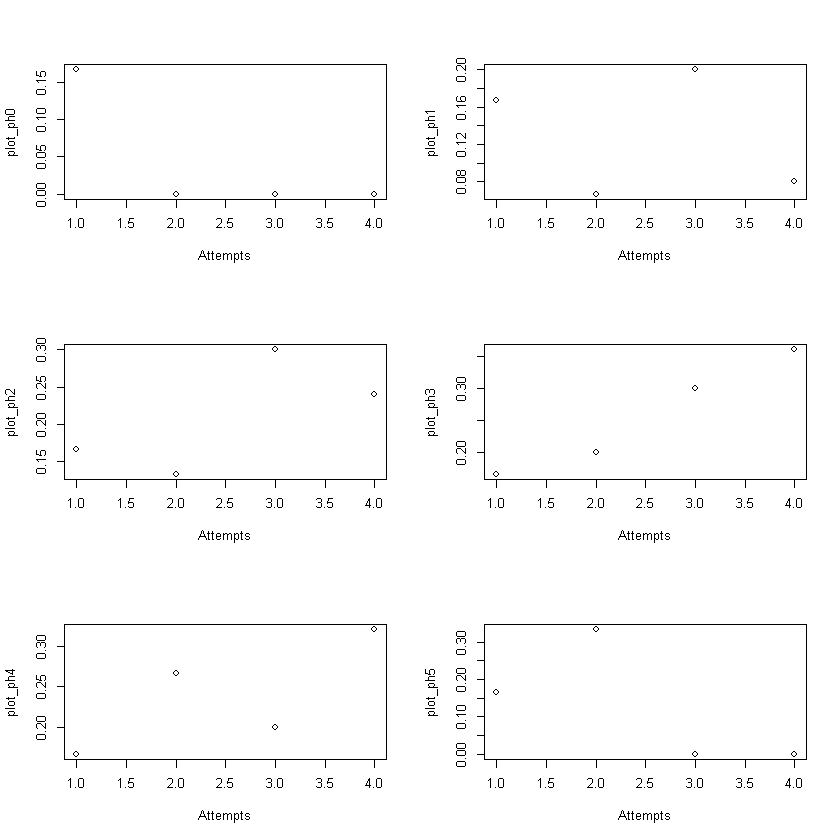

[1] "White Stone"
Box0:  0 Box1:  0.06153846 Box2:  0.2769231 Box3:  0.4153846 Box4:  0.2461538 Box5:  0 
What was the color of the stone? w/b/end > w


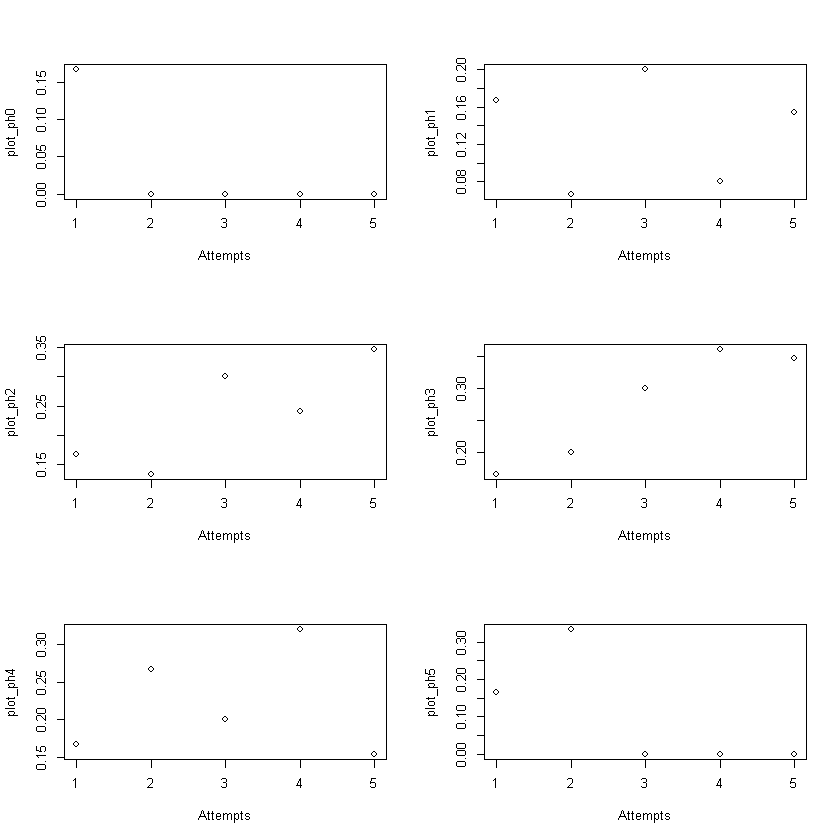

[1] "White Stone"
Box0:  0 Box1:  0.02162162 Box2:  0.1945946 Box3:  0.4378378 Box4:  0.3459459 Box5:  0 
What was the color of the stone? w/b/end > w


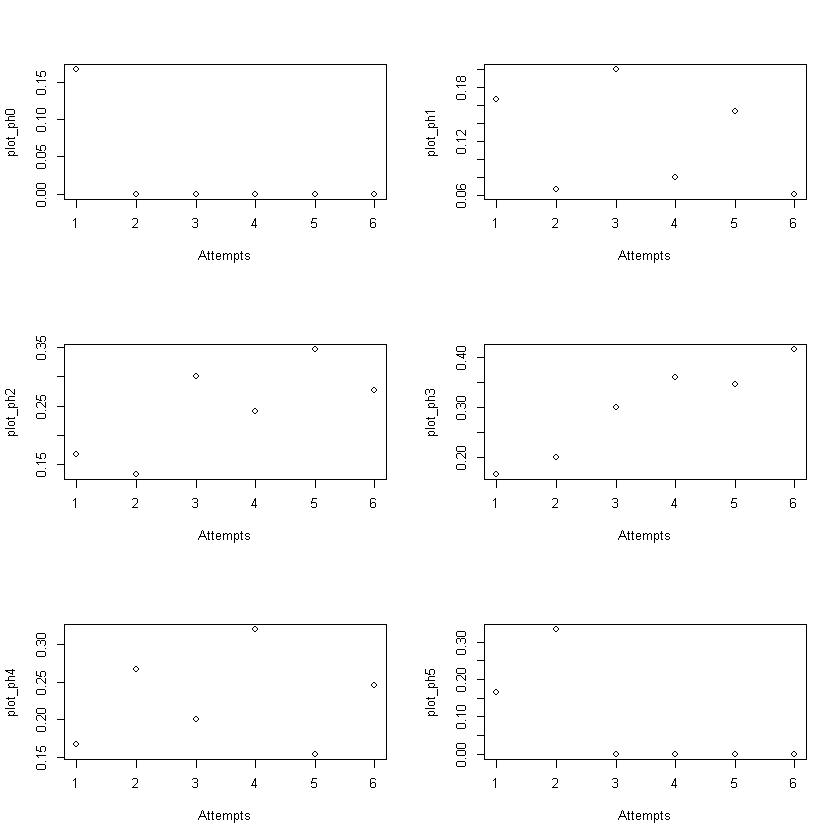

[1] "White Stone"
Box0:  0 Box1:  0.006956522 Box2:  0.1252174 Box3:  0.4226087 Box4:  0.4452174 Box5:  0 
What was the color of the stone? w/b/end > w


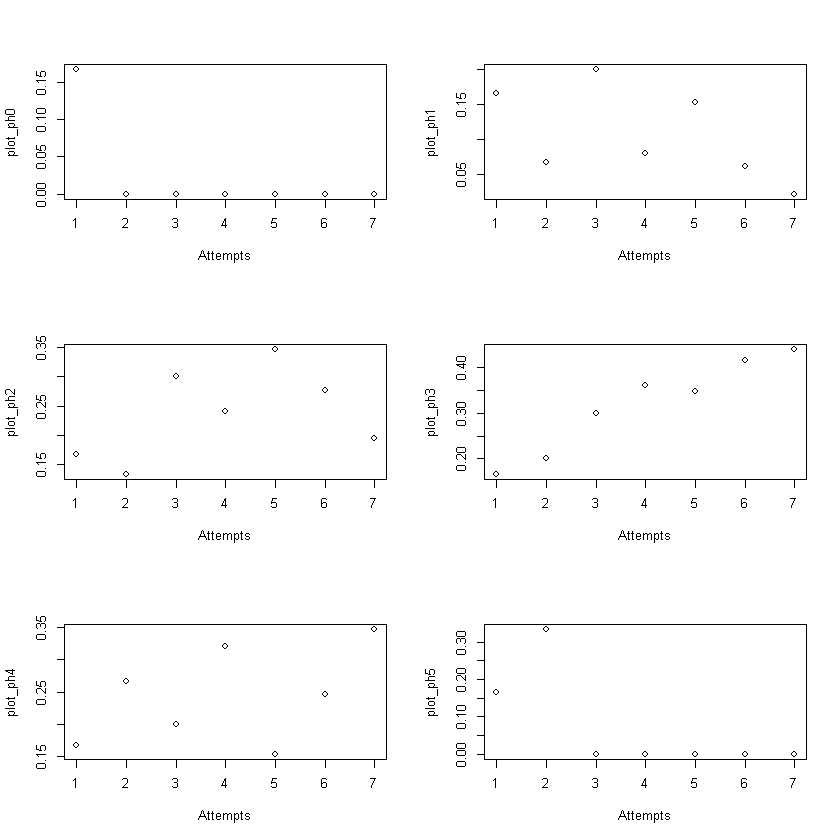

[1] "White Stone"
Box0:  0 Box1:  0.002104156 Box2:  0.07574961 Box3:  0.3834824 Box4:  0.5386639 Box5:  0 
What was the color of the stone? w/b/end > w


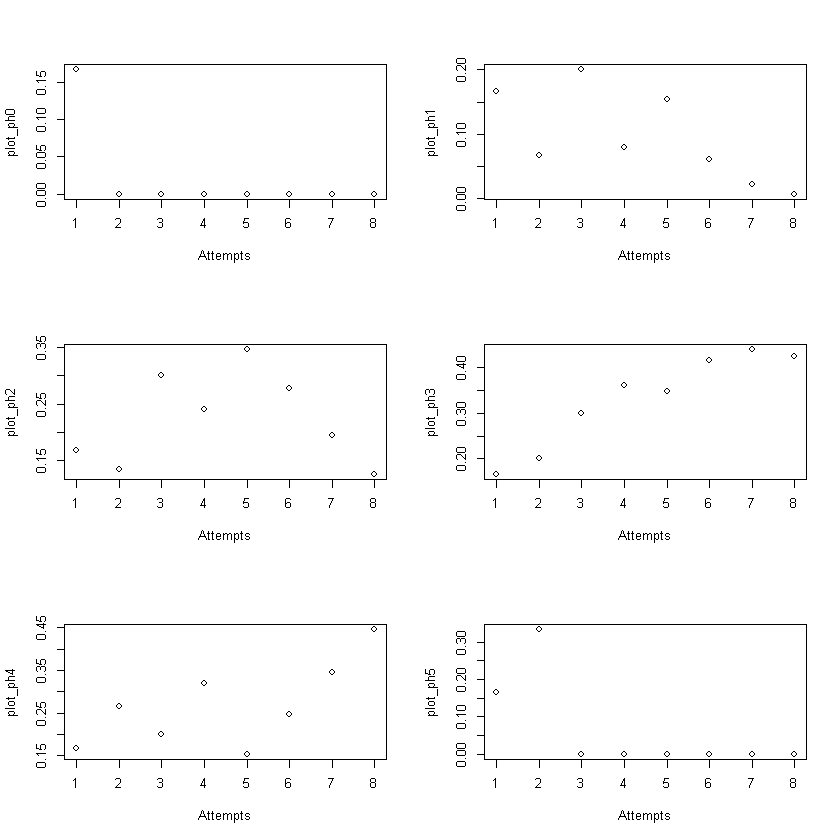

[1] "White Stone"
Box0:  0 Box1:  0.000608365 Box2:  0.04380228 Box3:  0.3326236 Box4:  0.6229658 Box5:  0 
What was the color of the stone? w/b/end > w


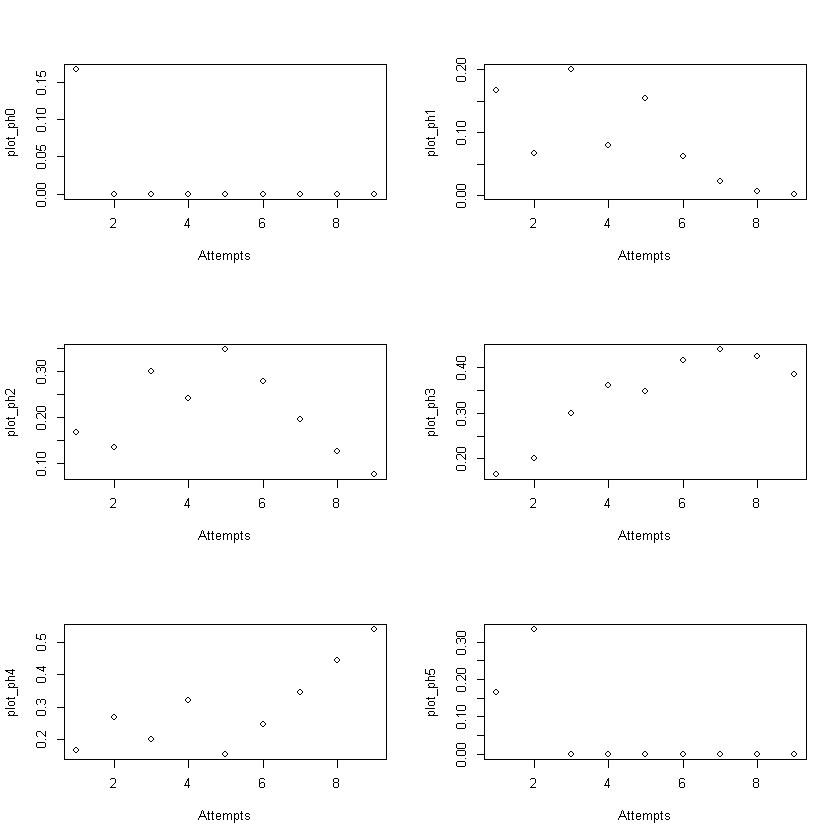

[1] "White Stone"
Box0:  0 Box1:  0.0001700319 Box2:  0.02448459 Box3:  0.2788948 Box4:  0.6964506 Box5:  0 
What was the color of the stone? w/b/end > 


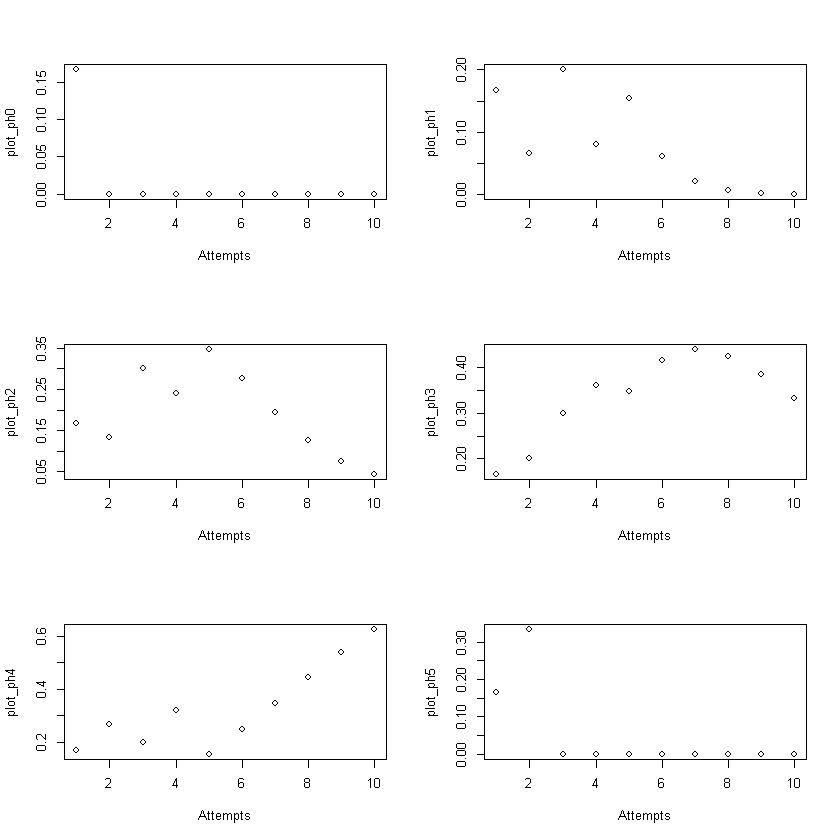

Box0:  0 Box1:  0.0001700319 Box2:  0.02448459 Box3:  0.2788948 Box4:  0.6964506 Box5:  0 
What was the color of the stone? w/b/end > 


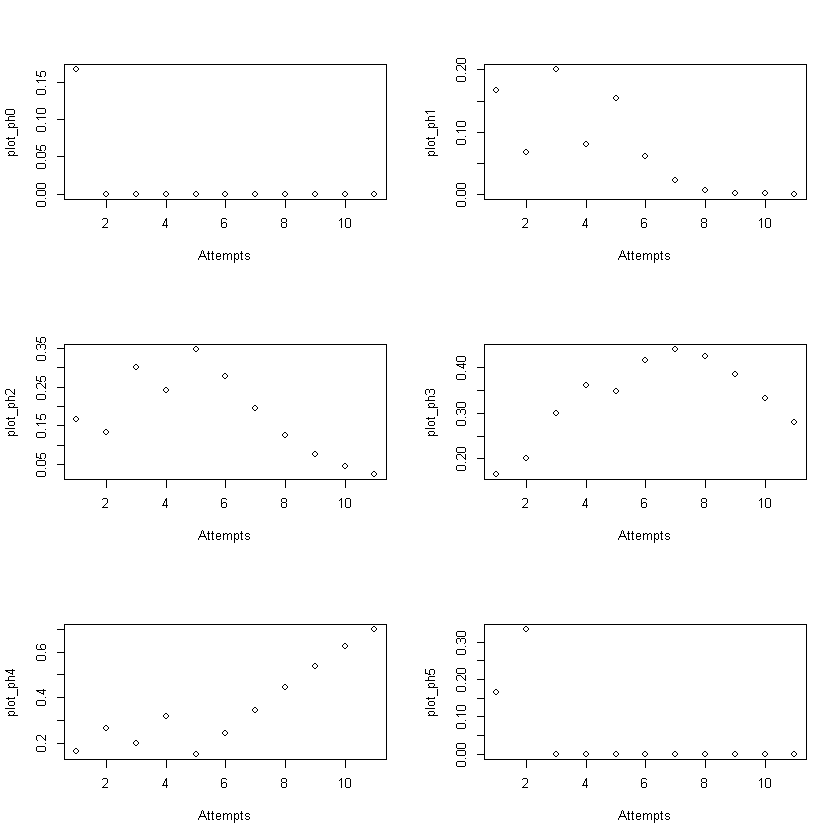

Box0:  0 Box1:  0.0001700319 Box2:  0.02448459 Box3:  0.2788948 Box4:  0.6964506 Box5:  0 
What was the color of the stone? w/b/end > b


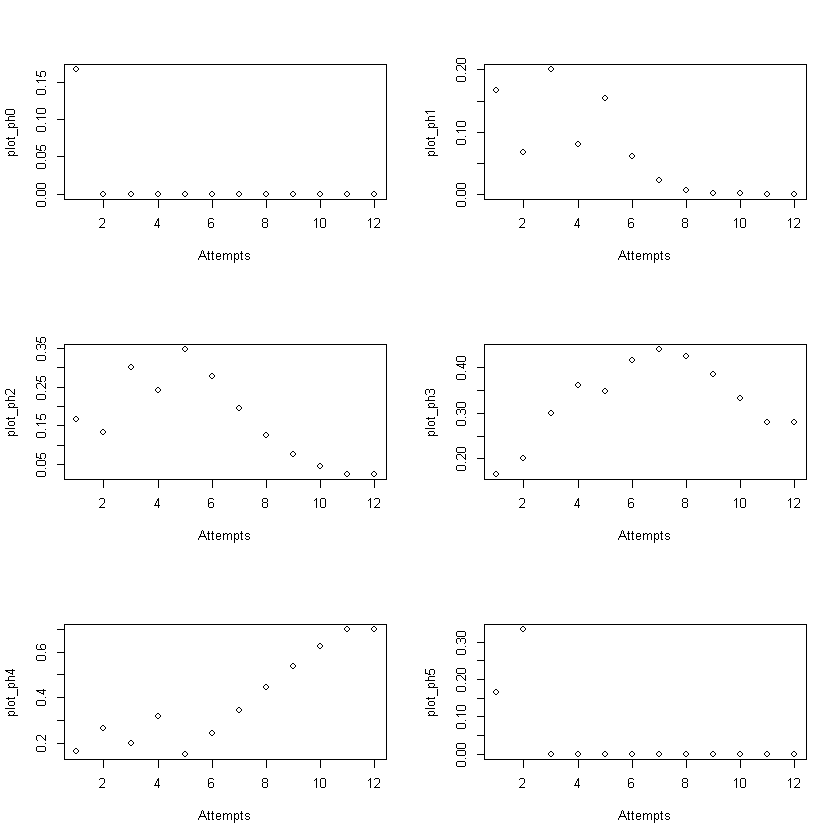

[1] "Black Stone"
Box0:  0 Box1:  0.000512 Box2:  0.055296 Box3:  0.419904 Box4:  0.524288 Box5:  0 
What was the color of the stone? w/b/end > b


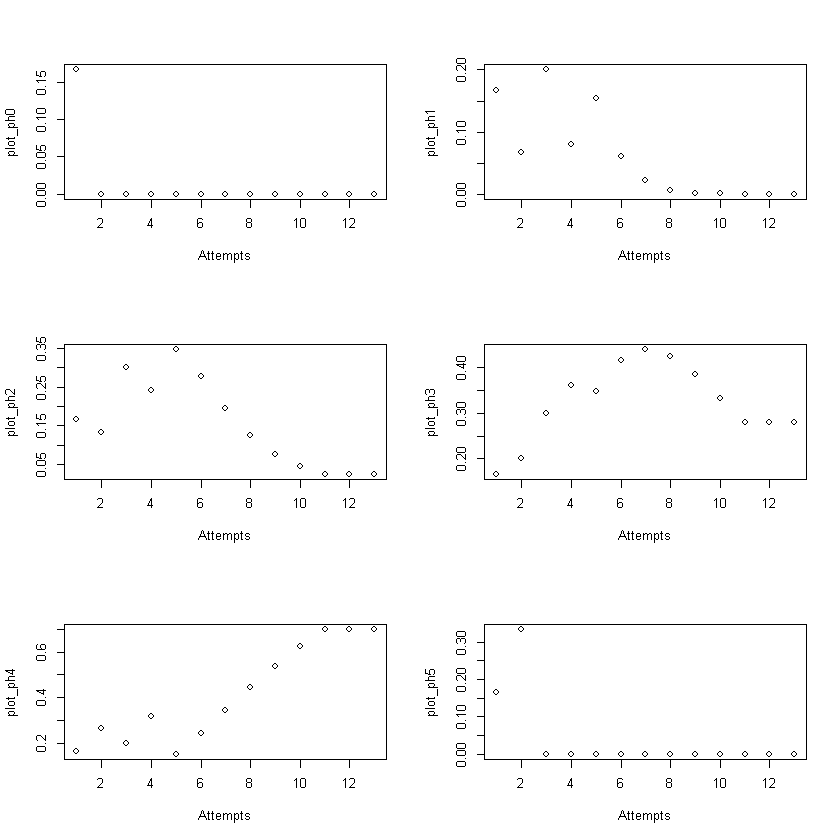

[1] "Black Stone"
Box0:  0 Box1:  0.001336787 Box2:  0.1082797 Box3:  0.5481661 Box4:  0.3422174 Box5:  0 
What was the color of the stone? w/b/end > b


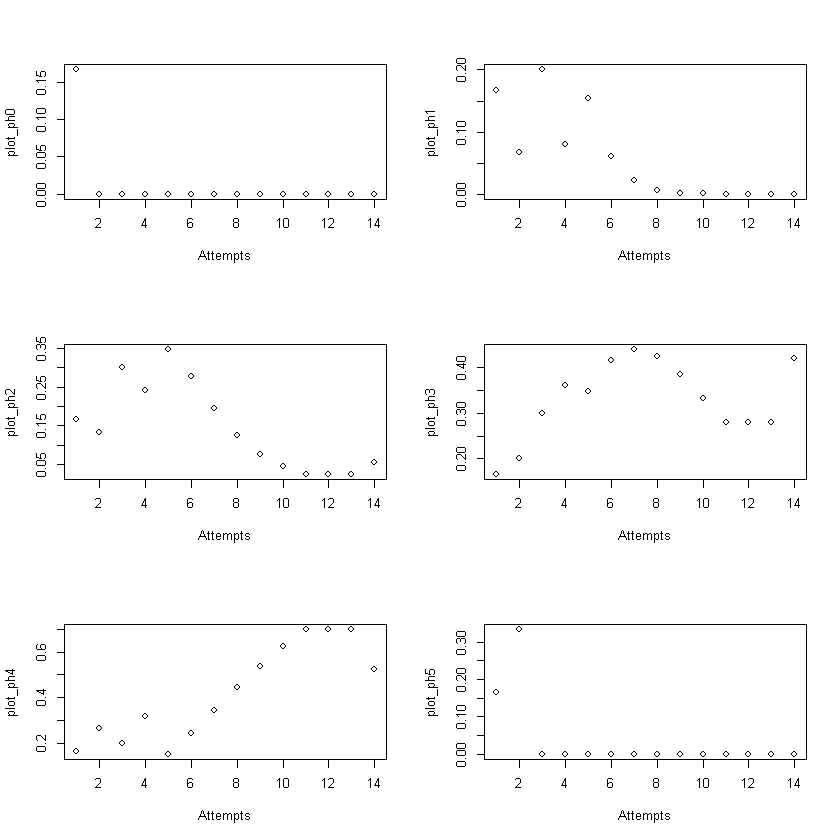

[1] "Black Stone"
Box0:  0 Box1:  0.003023146 Box2:  0.1836561 Box3:  0.6198394 Box4:  0.1934813 Box5:  0 
What was the color of the stone? w/b/end > w


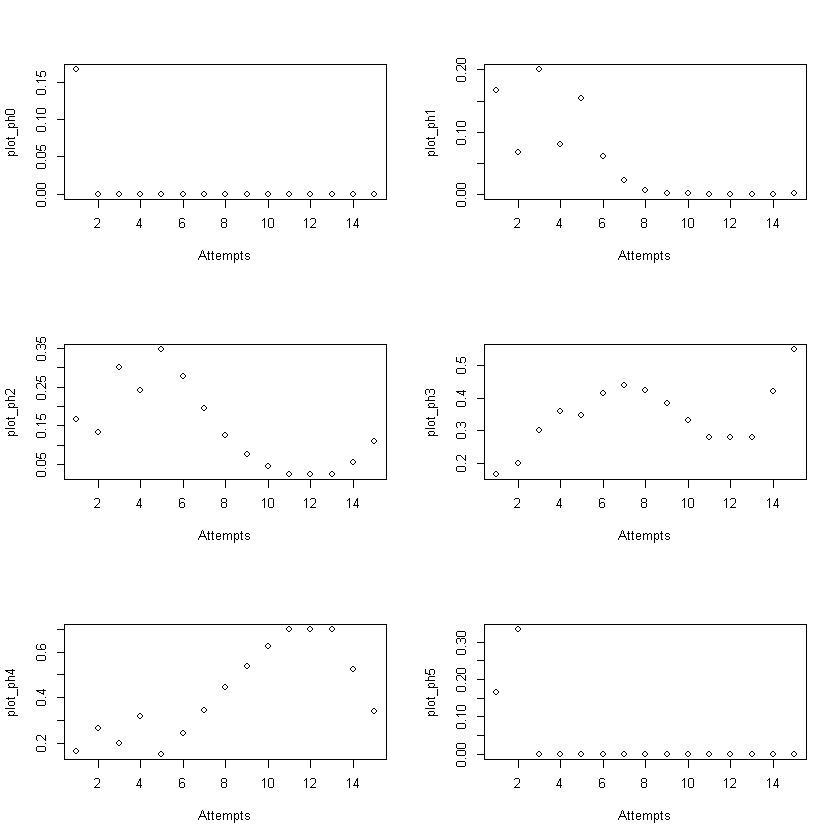

[1] "White Stone"
Box0:  0 Box1:  0.001006448 Box2:  0.1222834 Box3:  0.6190596 Box4:  0.2576506 Box5:  0 
What was the color of the stone? w/b/end > 


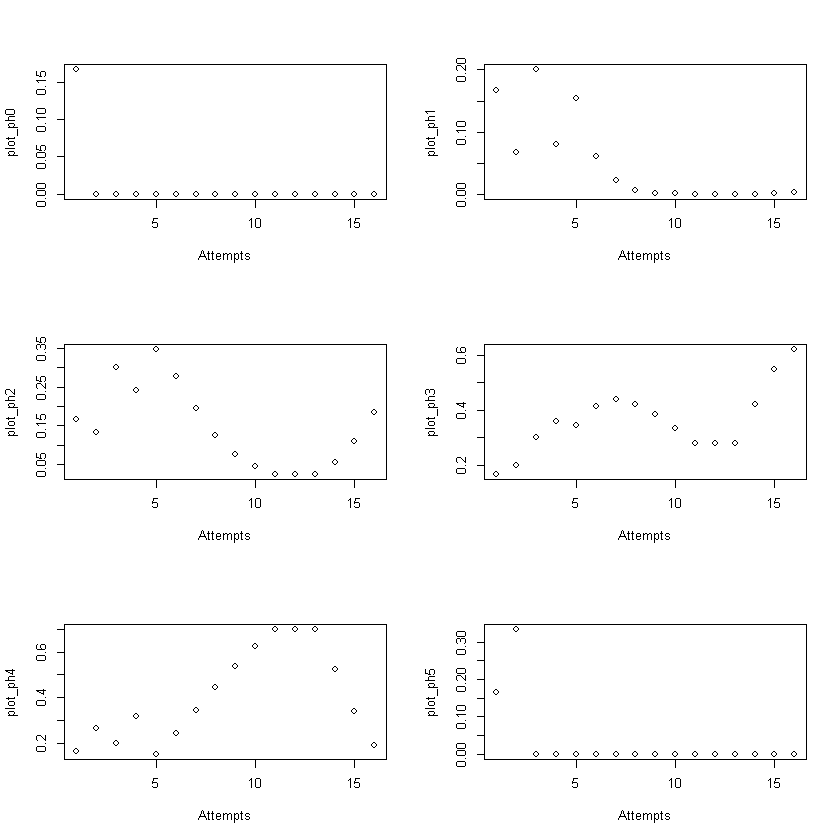

Box0:  0 Box1:  0.001006448 Box2:  0.1222834 Box3:  0.6190596 Box4:  0.2576506 Box5:  0 
What was the color of the stone? w/b/end > b


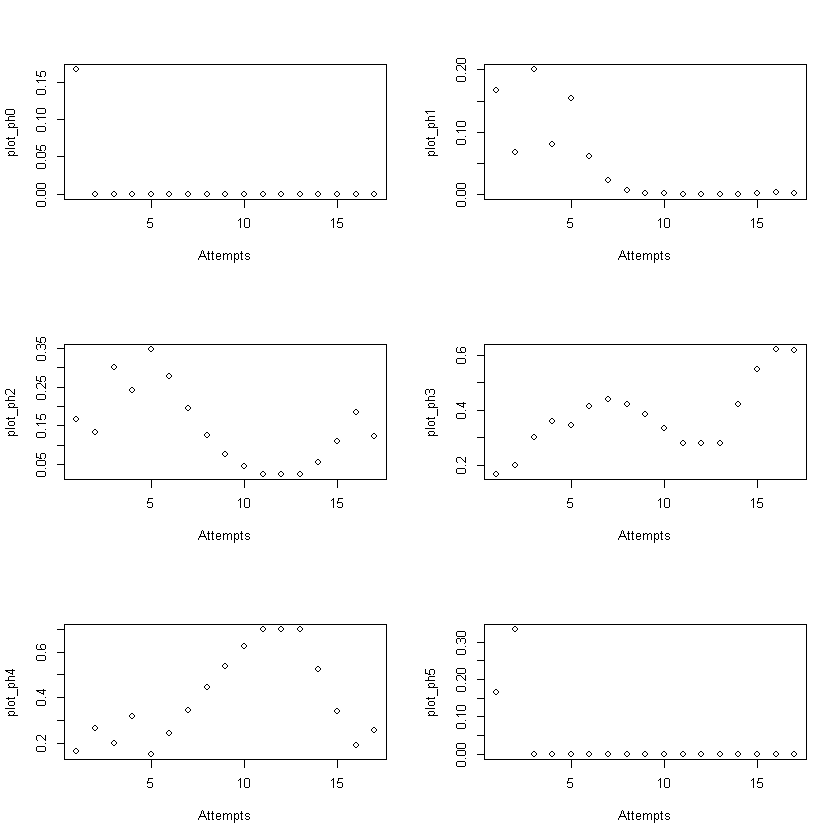

[1] "Black Stone"
Box0:  0 Box1:  0.002156698 Box2:  0.1965291 Box3:  0.6632856 Box4:  0.1380286 Box5:  0 
What was the color of the stone? w/b/end > w


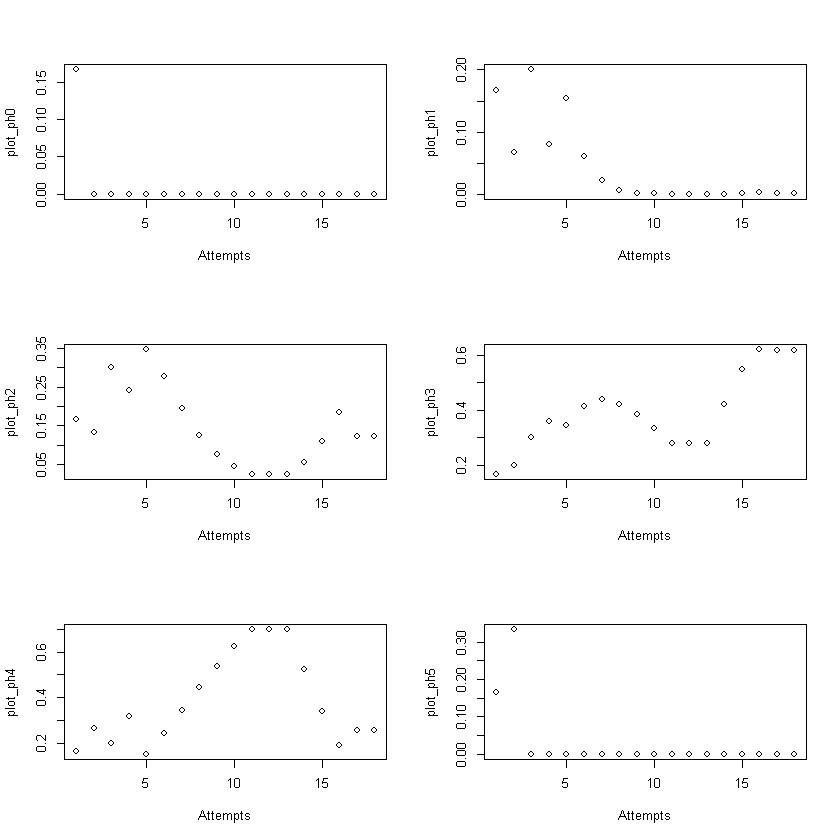

[1] "White Stone"
Box0:  0 Box1:  0.0007342734 Box2:  0.1338213 Box3:  0.6774704 Box4:  0.187974 Box5:  0 
What was the color of the stone? w/b/end > b


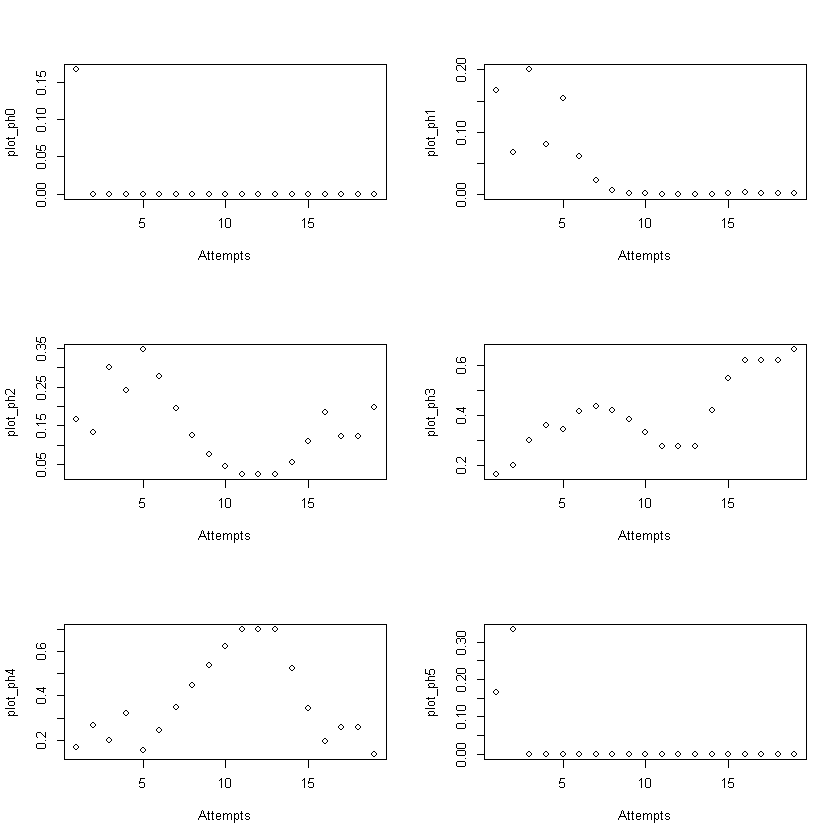

[1] "Black Stone"
Box0:  0 Box1:  0.001508278 Box2:  0.2061627 Box3:  0.6957992 Box4:  0.09652978 Box5:  0 
What was the color of the stone? w/b/end > end


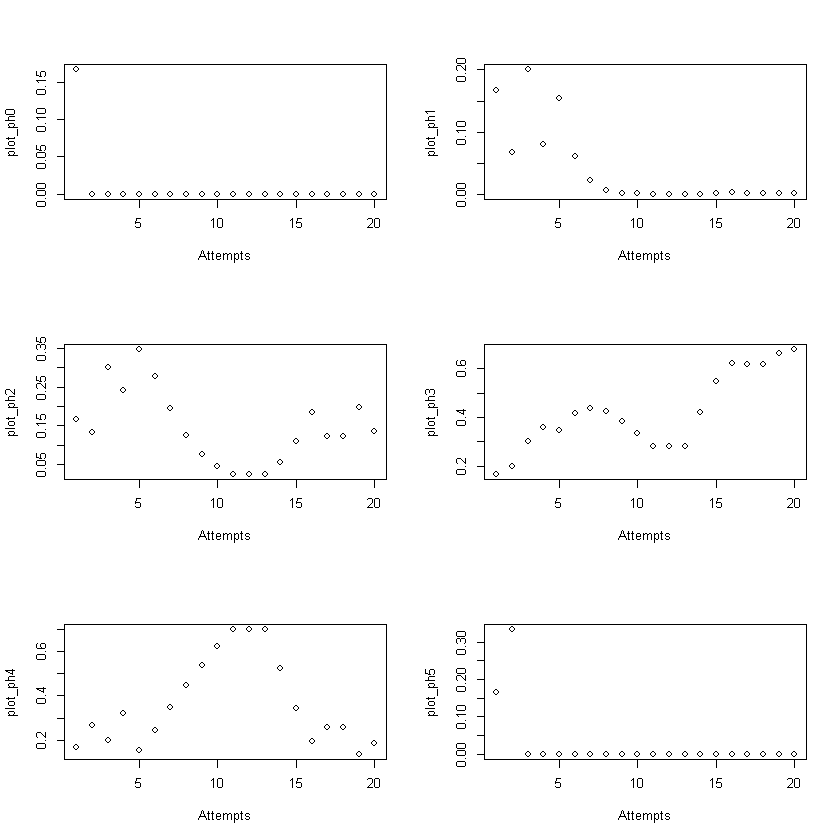

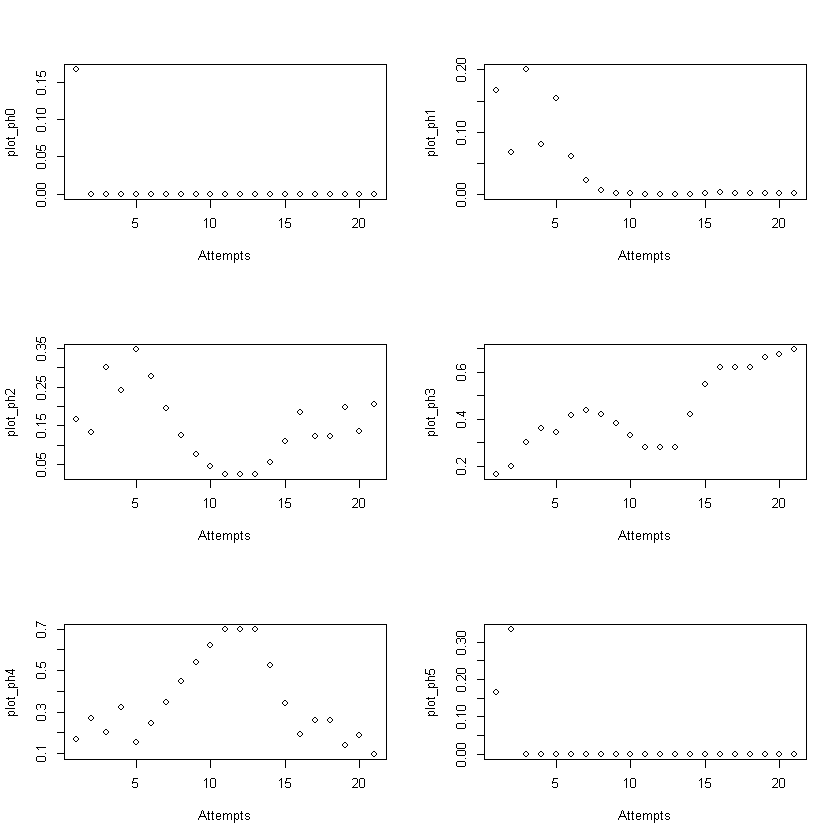

In [33]:
#We initialize some probabilities for each box

ps <- 0.5
ph <- c(1/6,1/6,1/6,1/6,1/6,1/6)
#We want some values to be retained to plot them constantly
plot_ph0 <- 1/6
plot_ph1 <- 1/6
plot_ph2 <- 1/6
plot_ph3 <- 1/6
plot_ph4 <- 1/6
plot_ph5 <- 1/6

att <- 0
j = c(0,1,2,3,4,5)

#Even if I send the plot here, it still doesnt plot it until the second loop
    par(mfrow=c(3,2))
    plot(seq(1,att+1),plot_ph0,xlab = "Attempts")
    plot(seq(1,att+1),plot_ph1,xlab = "Attempts")
    plot(seq(1,att+1),plot_ph2,xlab = "Attempts")
    plot(seq(1,att+1),plot_ph3,xlab = "Attempts")
    plot(seq(1,att+1),plot_ph4,xlab = "Attempts")
    plot(seq(1,att+1),plot_ph5,xlab = "Attempts")

while(T) {
    att <- att+1
    i <- 1
    #allows the user to insert the color of a randomly extracted stone
    num <- readline("What was the color of the stone? w/b/end > ")
       if (num == "w" || num == "W" || num =="White"){
           print("White Stone")
           denom <- sum(j/5*ph)
           while (i < 7){
           ph[i] <- j[i]/5*ph[i]/denom
#           print(ph[i])
           i  <- i+1

           }

       }
       if (num == "b" || num == "B" || num =="Black"){
           print("Black Stone")
           denom <- sum((5-j)/5*ph)
           while (i < 7){
           ph[i] <- (5-j[i])/5*ph[i]/denom
#           print(ph[i])
           i  <- i+1

           }

       }
           if (num == "break" || num =="end"){
            break
       }
    ##prints on the standard output the probability of selecting each box

    cat("Box0: ",ph[1],"Box1: ",ph[2],"Box2: ",ph[3],"Box3: ",ph[4],"Box4: ",ph[5],"Box5: ",ph[6],"\n")
    
    ##plots the probability for each box as a function of the extraction step
    plot_ph0 <- append(plot_ph0, ph[1])
    plot_ph1 <- append(plot_ph1, ph[2])
    plot_ph2 <- append(plot_ph2, ph[3])
    plot_ph3 <- append(plot_ph3, ph[4])
    plot_ph4 <- append(plot_ph4, ph[5])
    plot_ph5 <- append(plot_ph5, ph[6])
    par(mfrow=c(3,2))
    plot(seq(1,att+1),plot_ph0,xlab = "Attempts")
    plot(seq(1,att+1),plot_ph1,xlab = "Attempts")
    plot(seq(1,att+1),plot_ph2,xlab = "Attempts")
    plot(seq(1,att+1),plot_ph3,xlab = "Attempts")
    plot(seq(1,att+1),plot_ph4,xlab = "Attempts")
    plot(seq(1,att+1),plot_ph5,xlab = "Attempts")
    


     
  }

##For some reason i still do not know, my plots are delayed by two iterations

### Exercise 5 - Six Boxes Toy Model: Simulation

Number of attempts desired 30
[1] "Black Stone"
[1] "White Stone"
[1] "Black Stone"
[1] "White Stone"
[1] "Black Stone"
[1] "Black Stone"
[1] "White Stone"
[1] "Black Stone"
[1] "Black Stone"
[1] "White Stone"
[1] "Black Stone"
[1] "Black Stone"
[1] "Black Stone"
[1] "Black Stone"
[1] "Black Stone"
[1] "Black Stone"
[1] "White Stone"
[1] "White Stone"
[1] "Black Stone"
[1] "Black Stone"
[1] "Black Stone"
[1] "Black Stone"
[1] "White Stone"
[1] "White Stone"
[1] "Black Stone"
[1] "White Stone"
[1] "Black Stone"
[1] "White Stone"
[1] "Black Stone"
[1] "White Stone"
Box0:  0 Box1:  0.1000258 Box2:  0.8661758 Box3:  0.03379683 Box4:  1.526273e-06 Box5:  0 
The real box is Box #: 2 In number of attempts 30

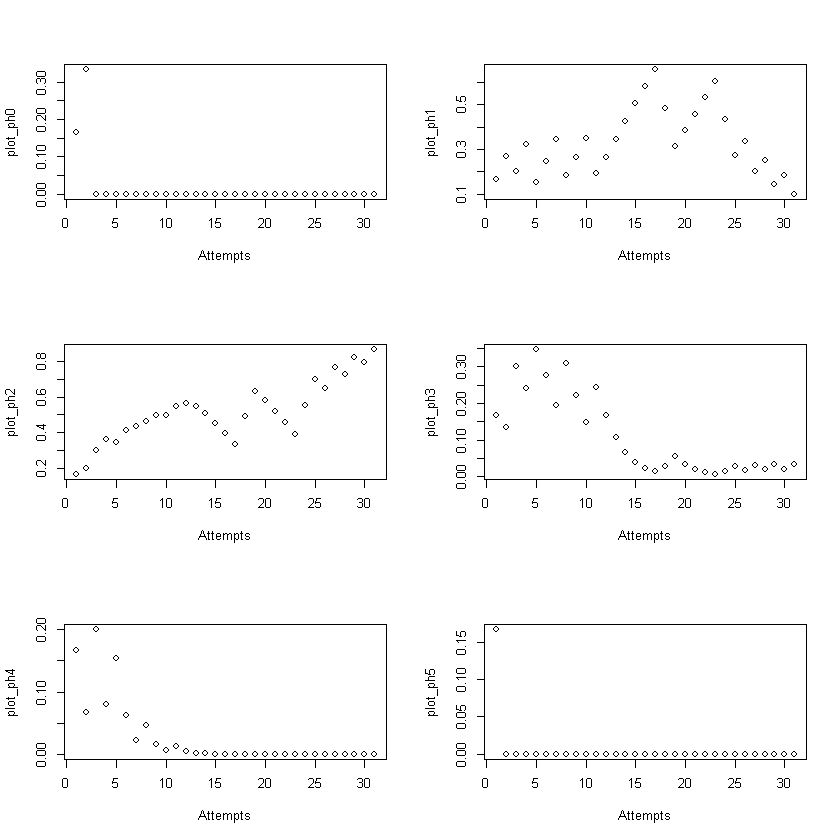

In [34]:
####Picking random box scenario
#Now we select from H0 to H5
box <- sample(0:5, 1)

ps <- 0.5
ph <- c(1/6,1/6,1/6,1/6,1/6,1/6)

plot_ph0 <- 1/6
plot_ph1 <- 1/6
plot_ph2 <- 1/6
plot_ph3 <- 1/6
plot_ph4 <- 1/6
plot_ph5 <- 1/6

att <- 0
j = c(0,1,2,3,4,5)

###Picking random stone
#Now the user picks the number of attempts
maxatt <- strtoi(readline("Number of attempts desired "))




while(att < maxatt) {
    att <- att+1
    i <- 1
    #allows the user to insert the color of a randomly extracted stone
    stone <- sample(0:4, 1)
    if (stone < box){
    color <- "w"
    }else{
    color <- "b"
    }
       if (color == "w" || color == "W" || color =="White"){
           print("White Stone")
           denom <- sum(j/5*ph)
           while (i < 7){
           ph[i] <- j[i]/5*ph[i]/denom
#           print(ph[i])
           i  <- i+1

           }

       }
       if (color == "b" || color == "B" || color =="Black"){
           print("Black Stone")
           denom <- sum((5-j)/5*ph)
           while (i < 7){
           ph[i] <- (5-j[i])/5*ph[i]/denom
#           print(ph[i])
           i  <- i+1

           }

       }
           if (color == "break" || color =="end"){
            break
       }
    ##prints on the standard output the probability of selecting each box

  #  cat("Box0: ",ph[1],"Box1: ",ph[2],"Box2: ",ph[3],"Box3: ",ph[4],"Box4: ",ph[5],"Box5: ",ph[6],"\n")
    
    ##plots the probability for each box as a function of the extraction step
    plot_ph0 <- append(plot_ph0, ph[1])
    plot_ph1 <- append(plot_ph1, ph[2])
    plot_ph2 <- append(plot_ph2, ph[3])
    plot_ph3 <- append(plot_ph3, ph[4])
    plot_ph4 <- append(plot_ph4, ph[5])
    plot_ph5 <- append(plot_ph5, ph[6])
 #   par(mfrow=c(3,2))
 #  plot(seq(1,att+1),plot_ph0,xlab = "Attempts")
  #  plot(seq(1,att+1),plot_ph1,xlab = "Attempts")
  #  plot(seq(1,att+1),plot_ph2,xlab = "Attempts")
    #plot(seq(1,att+1),plot_ph3,xlab = "Attempts")
  #  plot(seq(1,att+1),plot_ph4,xlab = "Attempts")
  #  plot(seq(1,att+1),plot_ph5,xlab = "Attempts")
    


     
  }

     
    par(mfrow=c(3,2))
    plot(seq(1,att+1),plot_ph0,xlab = "Attempts")
    plot(seq(1,att+1),plot_ph1,xlab = "Attempts")
    plot(seq(1,att+1),plot_ph2,xlab = "Attempts")
    plot(seq(1,att+1),plot_ph3,xlab = "Attempts")
    plot(seq(1,att+1),plot_ph4,xlab = "Attempts")
    plot(seq(1,att+1),plot_ph5,xlab = "Attempts")
    cat("Box0: ",ph[1],"Box1: ",ph[2],"Box2: ",ph[3],"Box3: ",ph[4],"Box4: ",ph[5],"Box5: ",ph[6],"\n")
    cat("The real box is Box #:", box, "In number of attempts",att )


#This part should only print the stone color obtained and the final graphs because the step by step part is muted